In [1]:
!pip install tensorflow

In [2]:
import cv2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [4]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
x_train =     tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)



Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8659 - loss: 0.4629
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9658 - loss: 0.1105
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9780 - loss: 0.0699


In [13]:
model.save('handwritten.keras')
model = tf.keras.models.load_model('handwritten.keras')

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9669 - loss: 0.1165
0.9708999991416931
0.10090885311365128


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


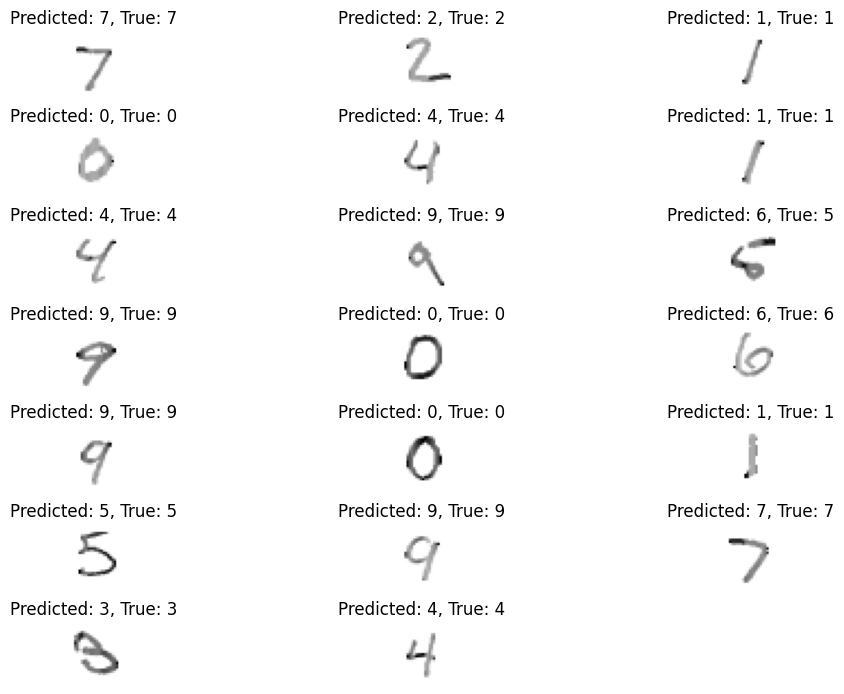

In [19]:
predictions = model.predict(x_test)

# Display some predictions and their corresponding images
num_images_to_display = 20

plt.figure(figsize=(10, 10))
for i in range(num_images_to_display):
    plt.subplot(10, 3, i + 1)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Confusion Matrix:


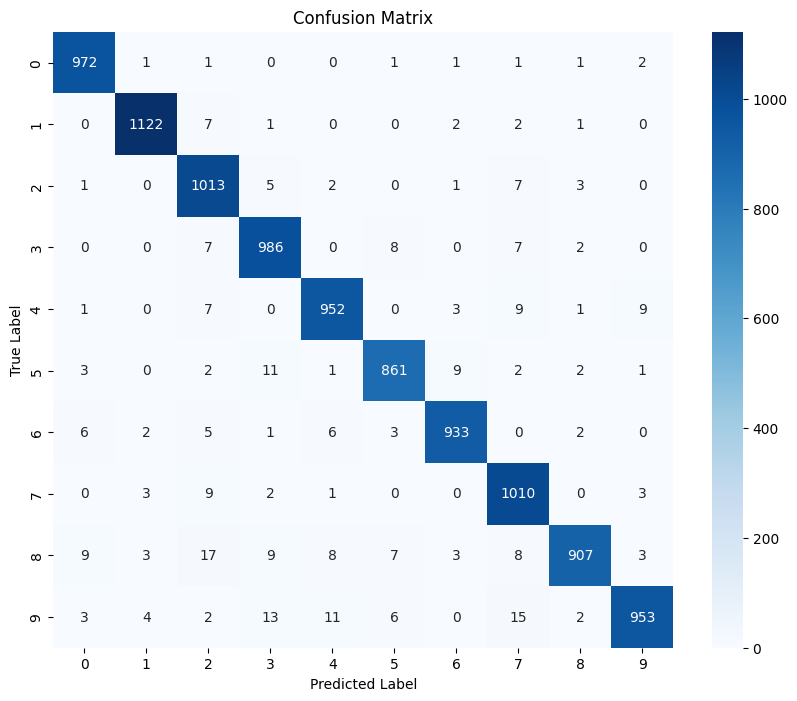


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.98      0.96      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.95      0.98      0.97      1028
           8       0.98      0.93      0.96       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


predicted_classes = np.argmax(predictions, axis=1)


conf_matrix = confusion_matrix(y_test, predicted_classes)


class_report = classification_report(y_test, predicted_classes)

print("Confusion Matrix:")

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(class_report)

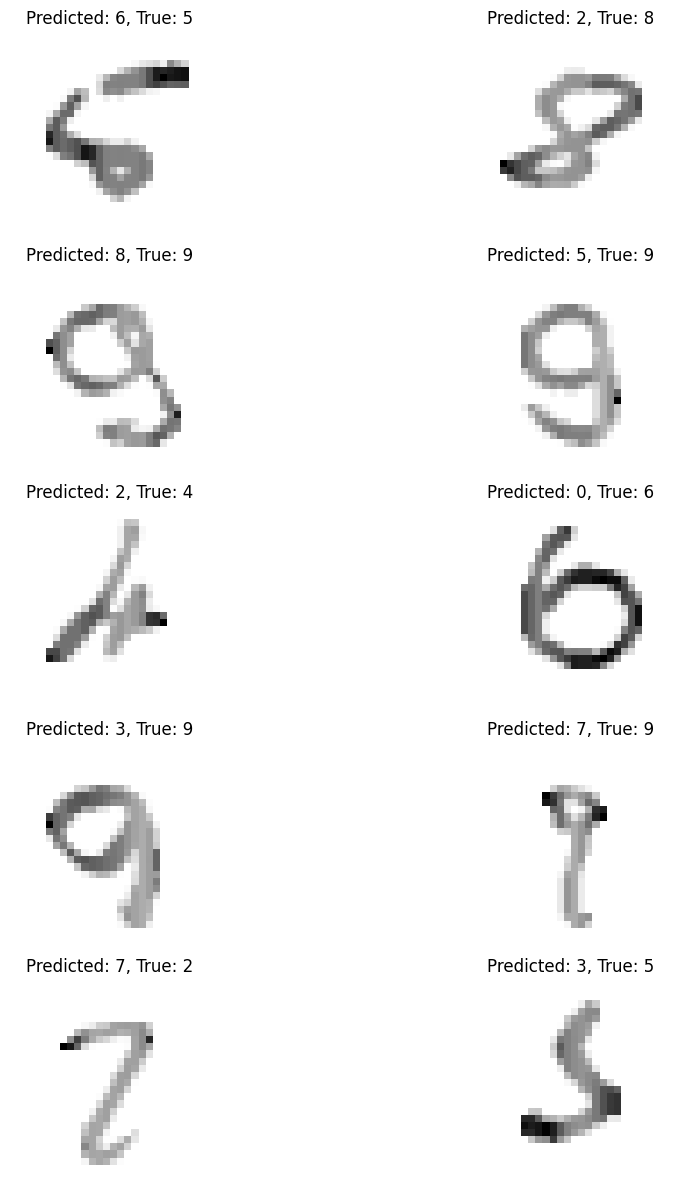

In [22]:
# Find misclassified examples
misclassified_indices = np.where(predicted_classes != y_test)[0]


num_misclassified_to_display = 10

plt.figure(figsize=(12, 12))
for i, incorrect_index in enumerate(misclassified_indices[:num_misclassified_to_display]):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[incorrect_index], cmap=plt.cm.binary)
    plt.title(f"Predicted: {predicted_classes[incorrect_index]}, True: {y_test[incorrect_index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


### Implementing an Improvement: Increasing Dense Layer Neurons

As a first attempt to improve the model, we will increase the number of neurons in the two hidden dense layers from 128 to 256. This increases the model's capacity, potentially allowing it to learn more complex patterns.

In [24]:
# Implement the Improvement (Step 2 of the plan)


model_improved = tf.keras.models.Sequential()
model_improved.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_improved.add(tf.keras.layers.Dense(256, activation='relu')) # Increased neurons
model_improved.add(tf.keras.layers.Dense(256, activation='relu')) # Increased neurons
model_improved.add(tf.keras.layers.Dense(10, activation='softmax'))


model_improved.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Display the improved model summary
model_improved.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:

print("Training the improved model...")
history_improved = model_improved.fit(x_train, y_train, epochs=3, verbose=0) # verbose=0 to reduce output



print("\nEvaluating the improved model...")
loss_improved, accuracy_improved = model_improved.evaluate(x_test, y_test, verbose=0) # verbose=0 to reduce output


# Compare Results
print("\n--- Model Performance Comparison ---")
print(f"Original Model Accuracy: {accuracy:.4f}")
print(f"Original Model Loss: {loss:.4f}")
print(f"Improved Model Accuracy: {accuracy_improved:.4f}")
print(f"Improved Model Loss: {loss_improved:.4f}")



Training the improved model...

Evaluating the improved model...

--- Model Performance Comparison ---
Original Model Accuracy: 0.9709
Original Model Loss: 0.1009
Improved Model Accuracy: 0.9734
Improved Model Loss: 0.0888


In [28]:
# Install required libraries
!pip install streamlit pyngrok joblib scikit-learn pandas numpy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [29]:
!ngrok config add-authtoken 30BMWS8vHi6gHSYUqJNFLJFpgkk_3229TadjUkCDsK2Eo5qwm

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok
import os
import threading
import time

# Kill any existing streamlit or ngrok process (to avoid port conflicts)
!pkill streamlit > /dev/null 2>&1
!pkill ngrok > /dev/null 2>&1

# Save the Streamlit app content to app.py
# This includes the code we added in previous steps
with open("app.py", "w") as f:
    f.write("""
import streamlit as st
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

st.title("Handwritten Digit Recognition with TensorFlow")

st.write("This app demonstrates a simple neural network trained on the MNIST dataset to recognize handwritten digits.")

# Load the trained model
@st.cache_resource # Cache the model so it's not reloaded every time
def load_my_model():
    model = tf.keras.models.load_model('handwritten.keras')
    return model

model = load_my_model()

# Load the MNIST test data for evaluation
# This should be done only once
@st.cache_data
def load_mnist_test_data():
    _, (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_test = tf.keras.utils.normalize(x_test, axis=1)
    return x_test, y_test

x_test, y_test = load_mnist_test_data()

# Add sections for evaluation metrics and visualizations

st.header("Model Performance Evaluation")

# Display Accuracy and Loss
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
st.write(f"**Accuracy on Test Set:** {accuracy:.4f}")
st.write(f"**Loss on Test Set:** {loss:.4f}")


# Confusion Matrix
st.subheader("Confusion Matrix")
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_test, predicted_classes)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')
st.pyplot(fig)

# Classification Report
st.subheader("Classification Report")
class_report = classification_report(y_test, predicted_classes, output_dict=True)
# Convert to DataFrame for better display in Streamlit
st.dataframe(pd.DataFrame(class_report).T)


# Visualize Misclassified Examples
st.subheader("Misclassified Examples")
misclassified_indices = np.where(predicted_classes != y_test)[0]
num_misclassified_to_display = min(10, len(misclassified_indices)) # Display up to 10

if num_misclassified_to_display > 0:
    st.write(f"Displaying {num_misclassified_to_display} misclassified examples:")
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 12))
    axes = axes.flatten()

    for i, incorrect_index in enumerate(misclassified_indices[:num_misclassified_to_display]):
        axes[i].imshow(x_test[incorrect_index].reshape(28, 28), cmap=plt.cm.binary)
        axes[i].set_title(f"Predicted: {predicted_classes[incorrect_index]}, True: {y_test[incorrect_index]}")
        axes[i].axis('off')

    plt.tight_layout()
    st.pyplot(fig)
else:
    st.write("No misclassified examples to display.")


# Optional: Add an interactive prediction feature later if desired
# st.subheader("Make a Prediction")
# Add a drawing canvas or file uploader here
""")

# Start the Streamlit app in the background
def run_streamlit():
    os.system("streamlit run app.py &")

threading.Thread(target=run_streamlit).start()

# Give Streamlit a moment to start
time.sleep(5)

# Setup a tunnel to the Streamlit port 8501
public_url = ngrok.connect("http://localhost:8501")
print(f"Streamlit App URL: {public_url}")

# Keep the script running until the tunnel is closed
try:
    while True:
        time.sleep(1)
except KeyboardInterrupt:
    print("Disconnecting ngrok tunnel...")
    ngrok.disconnect(public_url)
    print("Ngrok tunnel disconnected.")
    !pkill streamlit # Ensure streamlit process is killed on interrupt

Streamlit App URL: NgrokTunnel: "https://489fe920d164.ngrok-free.app" -> "http://localhost:8501"
